In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
root_path = os.path.abspath(os.path.dirname(os.getcwd()))
#data_path = os.path.join(root_path, 'data', f"{industry}", "Financial_Statistic_Agriculture")

### Get acess to the file of financial ratios based on different industries

In [73]:
def access_data(industry : str):
    #root_path = os.path.abspath(os.path.dirname(os.getcwd()))
    data_path = os.path.join(root_path, 'data', f"{industry}", "Financial Statistic_Agriculture")
    return data_path


In [74]:
data_path = (access_data("agriculture"))



### Generate company list of the industry



In [75]:
def read_company_list(industry: str):
    path = os.path.join(root_path, "data", f"{industry}_1.txt")
    company_list = []
    f=open(path,"r", encoding = 'utf-8',errors='ignore')
    for line in f:
        #print(line)
        #print(line.split("\t"))
        company_list.append(line.split('\t')[0])
    
    return company_list


In [76]:
company_list = read_company_list("agriculture")

In [77]:
company_list

['CTA-PB',
 'CTA-PA',
 'CTVA',
 'NTR',
 'FMC',
 'MOS',
 'SMG',
 'CF',
 'ICL',
 'MGPI',
 'UAN',
 'AVD',
 'IPI',
 'MBII',
 'SEED',
 'CGA',
 'RKDA',
 'YTEN']

In [78]:
len(company_list)

18

### Read data and generate DataFrame for each company

In [101]:
def read_data(company_list, data_path):
    df = [0] * len(company_list)
    for i in range(len(company_list)):
        df[i] = [0] * 11
        df[i][0] = pd.read_csv(os.path.join(data_path, f"{company_list[i]}_annual_financials.csv"), na_values=['#DIV/0!'])
        df[i][0].set_index("name", inplace = True)
        df[i][0] = df[i][0].T
        try:
            df[i][1] = cleaning_financial_ratio(df[i][0], "ROA1")
        except:
               pass
               
        try:
            df[i][2] = cleaning_financial_ratio(df[i][0], "ROA2")
        except:
               pass
               
        try:
            df[i][3] = cleaning_financial_ratio(df[i][0], "Operating Margin")
        except:
               pass
               
        try:
            df[i][4] = cleaning_financial_ratio(df[i][0], "Net Margin")
        except:
               pass
               
        try:
            df[i][5] = cleaning_financial_ratio(df[i][0], "Return On Equity")
        except:
               pass
               
        try:
            df[i][6] = cleaning_financial_ratio(df[i][0], "Current Ratio")
        except:
               pass
               
        try:
            df[i][7] = cleaning_financial_ratio(df[i][0], "Quick ratio")
        except:
               pass
               
        try:
            df[i][8] = cleaning_financial_ratio(df[i][0], "ROC")
        except:
               pass
               
        try:
            df[i][9] = cleaning_financial_ratio(df[i][0], "D/E ratio")
        except:
               pass
               
        try:
            df[i][10] = cleaning_financial_ratio(df[i][0], "EPS")
        except:
               pass
    return df

In [102]:
def cleaning_financial_ratio(df, ratio : str):
    df_r = df[ratio]
    df_r = pd.DataFrame(df_r)
    df_r.dropna(inplace = True)
    df_r[ratio] = pd.to_numeric(df_r[ratio])
#     df_r.set
    return df_r


In [109]:
df = read_data(company_list, data_path)


### look at length of each ratio and company

In [110]:
financial_ratio = ["ROA1","ROA2", "Operating Margin", "Net Margin", "Return On Equity", "Current Ratio", "Quick ratio", "ROC", "D/E ratio", "EPS"]

In [111]:
for i in range(len(company_list)):
    for j in range(1,11):
        try:
            print(company_list[i], financial_ratio[j-1], len(df[i][j]))
        except:
            pass

CTVA Operating Margin 5
CTVA Net Margin 5
CTVA Return On Equity 3
CTVA Current Ratio 3
CTVA Quick ratio 3
NTR ROA1 33
NTR ROA2 32
NTR Operating Margin 33
NTR Net Margin 33
NTR Return On Equity 33
NTR Current Ratio 33
NTR Quick ratio 33
NTR ROC 33
NTR D/E ratio 33
NTR EPS 32
FMC ROA1 35
FMC ROA2 34
FMC Operating Margin 35
FMC Net Margin 35
FMC Return On Equity 35
FMC Current Ratio 35
FMC Quick ratio 35
FMC ROC 35
FMC D/E ratio 35
FMC EPS 35
MOS ROA1 33
MOS ROA2 33
MOS Operating Margin 33
MOS Net Margin 33
MOS Return On Equity 33
MOS Current Ratio 33
MOS Quick ratio 33
MOS ROC 33
MOS D/E ratio 33
MOS EPS 33
SMG ROA1 31
SMG ROA2 30
SMG Operating Margin 31
SMG Net Margin 31
SMG Return On Equity 31
SMG Current Ratio 31
SMG Quick ratio 31
SMG ROC 31
SMG D/E ratio 31
SMG EPS 31
CF ROA1 18
CF ROA2 17
CF Operating Margin 18
CF Net Margin 18
CF Return On Equity 18
CF Current Ratio 16
CF Quick ratio 16
CF ROC 18
CF D/E ratio 18
CF EPS 18
ICL ROA1 16
ICL ROA2 15
ICL Operating Margin 16
ICL Net Mar

In [112]:
def valid_financial_ratio_list(company_list, ratio):
    valid_list = {}
    j = financial_ratio.index(ratio)
    for i in range(len(company_list)):
        try:
            if len(df[i][j + 1]) >= 8:
                print(company_list[i], financial_ratio[j], len(df[i][j + 1]))
                valid_list[company_list[i]] = df[i][j + 1]
            else:
                print(f"invalid company {company_list[i]}")

        except:
            pass
    return valid_list



### ROA data and plots

In [113]:
ROA1_company_list = valid_financial_ratio_list(company_list, "ROA1")


NTR ROA1 33
FMC ROA1 35
MOS ROA1 33
SMG ROA1 31
CF ROA1 18
ICL ROA1 16
MGPI ROA1 33
UAN ROA1 13
AVD ROA1 35
IPI ROA1 15
MBII ROA1 10
SEED ROA1 15
CGA ROA1 12
RKDA ROA1 9
YTEN ROA1 17


In [114]:
ROA2_company_list = valid_financial_ratio_list(company_list, "ROA2")


NTR ROA2 32
FMC ROA2 34
MOS ROA2 33
SMG ROA2 30
CF ROA2 17
ICL ROA2 15
MGPI ROA2 32
UAN ROA2 12
AVD ROA2 34
IPI ROA2 14
MBII ROA2 9
SEED ROA2 14
CGA ROA2 11
RKDA ROA2 8
YTEN ROA2 16


if ROA:  "YTEN""RKDA""MBII" can be regard as a outlier. 
if ROA changes: keep "YTEN"

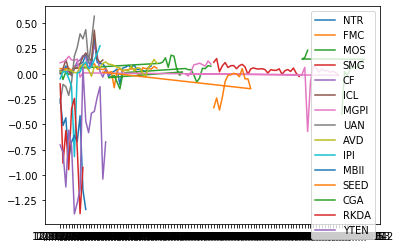

In [116]:
for key, value in ROA1_company_list.items():
    if key != "":
        plt.plot(value, label = key)
plt.legend()

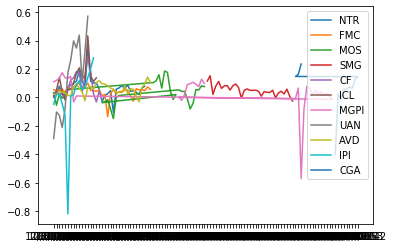

In [117]:
for key, value in ROA1_company_list.items():
    if key != "SEED" and key != "YTEN" and key != "RKDA" and key != "MBII":
        plt.plot(value, label = key)
plt.legend()

### operating margin and plots

In [49]:
OperatingMargin_company_list = valid_financial_ratio_list(company_list, "Operating Margin")

invalid company CTVA
NTR Operating Margin 33
FMC Operating Margin 35
MOS Operating Margin 33
SMG Operating Margin 31
CF Operating Margin 19
ICL Operating Margin 16
MGPI Operating Margin 33
UAN Operating Margin 13
AVD Operating Margin 35
IPI Operating Margin 15
MBII Operating Margin 10
SEED Operating Margin 14
CGA Operating Margin 12
RKDA Operating Margin 9
YTEN Operating Margin 17


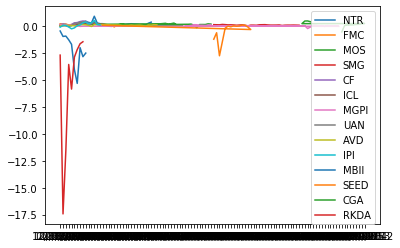

In [369]:
for key, value in OperatingMargin_company_list.items():
    if key != "YTEN":
        plt.plot(value, label = key)
plt.legend()

# YTEN can be consider an outlier

### net margin and plots

In [370]:
NetMargin_company_list = valid_financial_ratio_list(company_list, "Net Margin")

NTR Net Margin 33
FMC Net Margin 35
MOS Net Margin 33
SMG Net Margin 31
CF Net Margin 19
ICL Net Margin 16
MGPI Net Margin 33
UAN Net Margin 13
AVD Net Margin 35
IPI Net Margin 15
MBII Net Margin 10
SEED Net Margin 14
CGA Net Margin 12
RKDA Net Margin 9
YTEN Net Margin 17


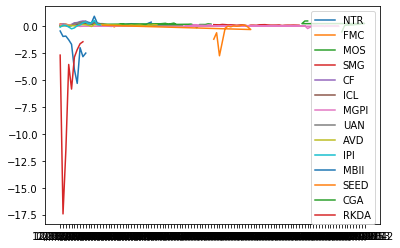

In [371]:
for key, value in NetMargin_company_list.items():
    if key != "YTEN":
        plt.plot(value, label = key)
plt.legend()

# YTEN can be consider an outlier

### ROE and plots


In [372]:
ROE_company_list = valid_financial_ratio_list(company_list, "Return On Equity")

NTR Return On Equity 33
FMC Return On Equity 35
MOS Return On Equity 33
SMG Return On Equity 31
CF Return On Equity 18
ICL Return On Equity 16
MGPI Return On Equity 33
AVD Return On Equity 35
IPI Return On Equity 15
MBII Return On Equity 10
SEED Return On Equity 16
CGA Return On Equity 12
RKDA Return On Equity 9
YTEN Return On Equity 17


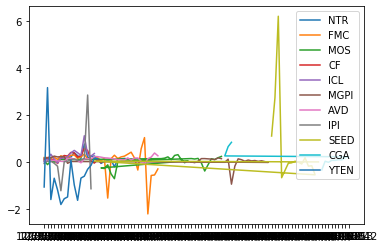

In [379]:
for key, value in ROE_company_list.items():
    if key != "MBII" and key != "SMG" and key != "RKDA":
        plt.plot(value, label = key)
plt.legend()

# remove MBII, SMG, RKDA
# SEED can be considered to remove

### current ratio and plots

In [407]:
CurrentRatio_company_list = valid_financial_ratio_list(company_list, "Current Ratio")

NTR Current Ratio 33
FMC Current Ratio 35
MOS Current Ratio 33
SMG Current Ratio 31
CF Current Ratio 16
ICL Current Ratio 16
MGPI Current Ratio 33
UAN Current Ratio 13
AVD Current Ratio 35
IPI Current Ratio 15
MBII Current Ratio 10
SEED Current Ratio 16
CGA Current Ratio 12
RKDA Current Ratio 9
YTEN Current Ratio 17


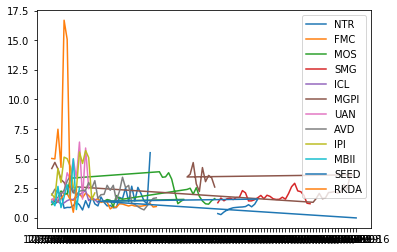

In [395]:
for key, value in CurrentRatio_company_list.items():
    if key != "CF" and key != "CGA" and key != "YTEN":
        plt.plot(value, label = key)
plt.legend()

### quick ratio and plots

In [408]:
QuickRatio_company_list = valid_financial_ratio_list(company_list, "Quick ratio")

NTR Quick ratio 33
FMC Quick ratio 35
MOS Quick ratio 33
SMG Quick ratio 31
CF Quick ratio 16
ICL Quick ratio 16
MGPI Quick ratio 33
UAN Quick ratio 13
AVD Quick ratio 35
IPI Quick ratio 15
MBII Quick ratio 10
SEED Quick ratio 16
CGA Quick ratio 12
RKDA Quick ratio 9
YTEN Quick ratio 17


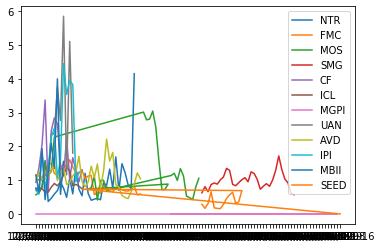

In [415]:
for key, value in QuickRatio_company_list.items():
    if key != "RKDA" and key != "CGA" and key != "YTEN":
        plt.plot(value, label = key)
plt.legend()

### roc and plots

In [416]:
ROC_company_list = valid_financial_ratio_list(company_list, "ROC")

NTR ROC 33
FMC ROC 35
MOS ROC 33
SMG ROC 31
CF ROC 18
ICL ROC 16
MGPI ROC 33
UAN ROC 12
AVD ROC 35
IPI ROC 15
MBII ROC 10
SEED ROC 16
CGA ROC 12
RKDA ROC 9
YTEN ROC 17


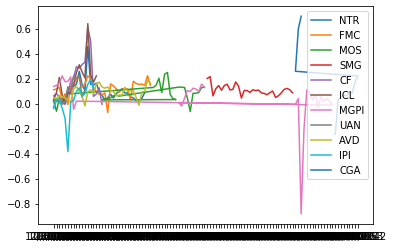

In [424]:
for key, value in ROC_company_list.items():
    if key != "RKDA" and key != "MBII" and key != "YTEN"and key != "SEED":
        plt.plot(value, label = key)
plt.legend()

### D/E ratio and plots

In [426]:
DE_company_list = valid_financial_ratio_list(company_list, "D/E ratio")

NTR D/E ratio 33
FMC D/E ratio 35
MOS D/E ratio 33
SMG D/E ratio 31
CF D/E ratio 18
ICL D/E ratio 16
MGPI D/E ratio 33
UAN D/E ratio 12
AVD D/E ratio 35
IPI D/E ratio 15
MBII D/E ratio 10
SEED D/E ratio 16
CGA D/E ratio 12
RKDA D/E ratio 9
YTEN D/E ratio 17


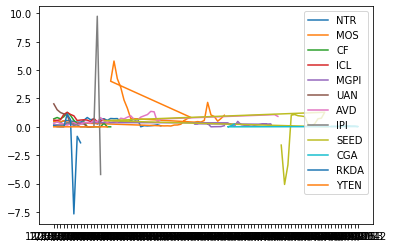

In [431]:
for key, value in DE_company_list.items():
    if key != "SMG" and key != "FMC" and key != "MBII"and key != "":
        plt.plot(value, label = key)
plt.legend()

### EPS and plots

In [432]:
EPS_company_list = valid_financial_ratio_list(company_list, "EPS")

NTR EPS 32
FMC EPS 35
MOS EPS 33
SMG EPS 31
CF EPS 18
ICL EPS 15
MGPI EPS 33
UAN EPS 13
AVD EPS 35
IPI EPS 15
MBII EPS 10
SEED EPS 16
CGA EPS 12
RKDA EPS 9
YTEN EPS 17


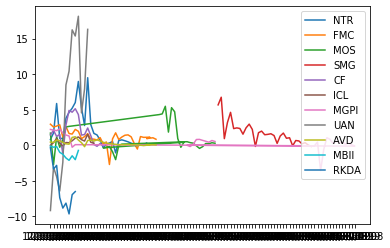

In [437]:
for key, value in EPS_company_list.items():
    if key != "YTEN" and key != "SEED" and key != "IPI"and key != "CGA":
        plt.plot(value, label = key)
plt.legend()

In [215]:
df[0][1]

,ROA
12/31/2020,0.015968
12/31/2019,-0.022620
12/31/2018,-0.116395


In [216]:
financial_ratio[0]

'ROA'

In [157]:
a = df[0][0]["ROA"]

In [173]:
a = cleaning_financial_ratio(df[0][0], "ROA")

In [205]:
print(column for column in a)

<generator object <genexpr> at 0x124fd5ed0>


In [159]:
a = pd.DataFrame(a)

In [164]:
a

,ROA
12/31/2020,0.015967549
12/31/2019,-0.022619525
12/31/2018,-0.11639459


In [163]:
a.dropna(inplace = True)

In [152]:
a["ROA"] = pd.to_numeric(a["ROA"])

ValueError: Unable to parse string "#DIV/0!" at position 4

In [143]:
a

name,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tOtherGandA,\tResearchAndDevelopment,\tDepreciationAmortizationDepletionIncomeStatement,...,TotalDebt,ShareIssued,OrdinarySharesNumber,NaN,ROA,Operating Margin,Net Margin,Return On Equity,Current Ratio,Quick ratio
12/31/2020,"14,217,000,000","14,217,000,000","8,507,000,000","5,710,000,000","4,867,000,000","3,043,000,000","3,043,000,000","3,043,000,000","1,142,000,000","682,000,000",...,"1,105,000,000","743,458,000","743,458,000",NaN,0.015967549,0.05929521,0.05929521,0.027433129,1.727655592,1.156527843
12/31/2019,"13,846,000,000","13,846,000,000","8,575,000,000","5,271,000,000","4,687,000,000","3,065,000,000","3,065,000,000","3,065,000,000","1,147,000,000","475,000,000",...,"122,000,000","748,577,000","748,577,000",NaN,-0.022619525,0.042178246,0.042178246,-0.039450409,1.641053654,1.030225783
12/31/2018,"14,287,000,000","14,287,000,000","8,521,000,000","5,766,000,000","4,476,000,000","2,902,000,000","2,902,000,000","2,902,000,000","1,432,000,000","391,000,000",...,"2,068,000,000","748,815,000","748,815,000",NaN,-0.11639459,0.090291874,0.090291874,-0.211851097,1.384430658,0.859115469
12/31/2017,"14,240,000,000","14,240,000,000","8,402,000,000","5,838,000,000","5,650,000,000","2,972,000,000","2,972,000,000","2,972,000,000","1,509,000,000","270,000,000",...,NaN,NaN,NaN,NaN,#DIV/0!,0.013202247,0.013202247,#DIV/0!,#DIV/0!,#DIV/0!
12/31/2016,"14,041,000,000","14,041,000,000","8,391,000,000","5,650,000,000","4,764,000,000","2,937,000,000","2,937,000,000","2,937,000,000","1,507,000,000","247,000,000",...,NaN,NaN,NaN,NaN,#DIV/0!,0.063100919,0.063100919,#DIV/0!,#DIV/0!,#DIV/0!


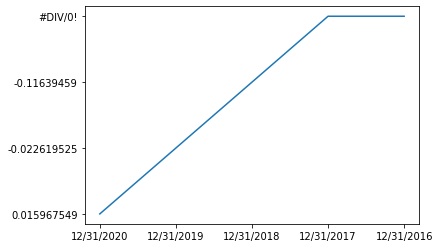

In [145]:
plt.plot(a["ROA"])

In [439]:
2000/40

50.0

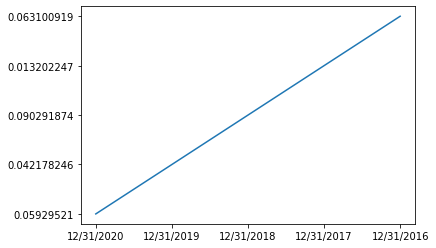

In [92]:
plt.plot(df[2][0]["Net Margin"])

In [77]:

a = pd.read_csv(os.path.join(data_path, "NTR_annual_financials.csv"))

In [20]:
a = pd.DataFrame(a)

In [21]:
a

,name,12/31/2020,12/31/2019,12/31/2018,12/31/2017,12/31/2016,12/31/2015,12/31/2014,12/31/2013,12/31/2012,...,12/31/1997,12/31/1996,12/31/1995,12/31/1994,12/31/1993,12/31/1992,12/31/1991,12/31/1990,12/31/1989,12/31/1988
0,TotalRevenue,"20,908,000,000","20,023,000,000","19,636,000,000","4,547,000,000","4,456,000,000","6,279,000,000","7,115,000,000","7,305,000,000","7,927,000,000",...,"2,325,900,000","1,403,900,000","906,900,000","425,400,000","313,200,000","291,000,000","265,200,000","238,500,000","277,900,000","305,800,000"
1,\tOperatingRevenue,"20,908,000,000","20,023,000,000","19,636,000,000","4,547,000,000","4,456,000,000","6,279,000,000","7,115,000,000","7,305,000,000","7,927,000,000",...,"2,325,900,000","1,403,900,000","906,900,000","425,400,000","313,200,000","291,000,000","265,200,000","238,500,000","277,900,000","305,800,000"
2,CostOfRevenue,"15,669,000,000","14,582,000,000","14,244,000,000","3,872,000,000","3,626,000,000","4,010,000,000","4,468,000,000","4,515,000,000","4,517,000,000",...,"1,570,800,000","920,400,000","526,400,000","216,500,000","156,400,000","148,100,000","130,000,000","124,700,000","114,100,000","127,500,000"
3,GrossProfit,"5,239,000,000","5,441,000,000","5,392,000,000","675,000,000","830,000,000","2,269,000,000","2,647,000,000","2,790,000,000","3,410,000,000",...,"755,100,000","483,500,000","380,500,000","208,900,000","156,800,000","142,900,000","135,200,000","113,800,000","163,800,000","178,300,000"
4,OperatingExpense,"3,548,000,000","3,359,000,000","3,177,000,000","385,000,000","353,000,000","588,000,000","520,000,000","438,000,000","411,000,000",...,"340,000,000","190,600,000","172,900,000","122,400,000","96,500,000","96,500,000","91,300,000","83,500,000","87,500,000","63,900,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Current Ratio,1.35259434,1.168255012,1.399160168,2.074282147,0.821449617,0.88895249,0.881710646,1.035967818,1.346278317,...,1.622128975,2.53271028,1.372500685,2.67804878,1.423698384,2.578754579,2.062706271,1.433451119,1.185774059,5.508250825
167,Quick ratio,0.771226415,0.623288422,0.809238152,1.582397004,0.36888627,0.460217516,0.587807097,0.69143398,0.935275081,...,0.841651943,1.326553051,0.764721994,1.687804878,0.698384201,1.487179487,1.226072607,0.861012956,0.748117155,4.155115512
168,ROC,0.01962406,0.041880851,0.008300642,0.011188795,0.039286943,0.11162503,0.127100782,0.138320678,0.154928893,...,0.097223503,0.119483204,0.085497314,0.086142192,0.052970436,0.045957552,0.024844369,0.016993831,0.042785047,0.087520262
169,D/E ratio,0.456964006,0.438628711,0.377604913,0.534866916,0.559946335,0.504294918,0.482939035,0.408911508,0.411723164,...,0.554199022,0.442404838,0.708833239,0.002695977,0.099937862,0.082463929,0.099336375,0.131225547,0.182189813,0.088625124


In [25]:
a.set_index("name", inplace = True)

In [45]:
a

,12/31/2020,12/31/2019,12/31/2018,12/31/2017,12/31/2016,12/31/2015,12/31/2014,12/31/2013,12/31/2012,12/31/2011,...,12/31/1997,12/31/1996,12/31/1995,12/31/1994,12/31/1993,12/31/1992,12/31/1991,12/31/1990,12/31/1989,12/31/1988
name,,,,,,,,,,,,,,,,,,,,,
TotalRevenue,"20,908,000,000","20,023,000,000","19,636,000,000","4,547,000,000","4,456,000,000","6,279,000,000","7,115,000,000","7,305,000,000","7,927,000,000","8,715,000,000",...,"2,325,900,000","1,403,900,000","906,900,000","425,400,000","313,200,000","291,000,000","265,200,000","238,500,000","277,900,000","305,800,000"
\tOperatingRevenue,"20,908,000,000","20,023,000,000","19,636,000,000","4,547,000,000","4,456,000,000","6,279,000,000","7,115,000,000","7,305,000,000","7,927,000,000","8,715,000,000",...,"2,325,900,000","1,403,900,000","906,900,000","425,400,000","313,200,000","291,000,000","265,200,000","238,500,000","277,900,000","305,800,000"
CostOfRevenue,"15,669,000,000","14,582,000,000","14,244,000,000","3,872,000,000","3,626,000,000","4,010,000,000","4,468,000,000","4,515,000,000","4,517,000,000","4,429,000,000",...,"1,570,800,000","920,400,000","526,400,000","216,500,000","156,400,000","148,100,000","130,000,000","124,700,000","114,100,000","127,500,000"
GrossProfit,"5,239,000,000","5,441,000,000","5,392,000,000","675,000,000","830,000,000","2,269,000,000","2,647,000,000","2,790,000,000","3,410,000,000","4,286,000,000",...,"755,100,000","483,500,000","380,500,000","208,900,000","156,800,000","142,900,000","135,200,000","113,800,000","163,800,000","178,300,000"
OperatingExpense,"3,548,000,000","3,359,000,000","3,177,000,000","385,000,000","353,000,000","588,000,000","520,000,000","438,000,000","411,000,000","364,000,000",...,"340,000,000","190,600,000","172,900,000","122,400,000","96,500,000","96,500,000","91,300,000","83,500,000","87,500,000","63,900,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Current Ratio,1.35259434,1.168255012,1.399160168,2.074282147,0.821449617,0.88895249,0.881710646,1.035967818,1.346278317,1.097538742,...,1.622128975,2.53271028,1.372500685,2.67804878,1.423698384,2.578754579,2.062706271,1.433451119,1.185774059,5.508250825
Quick ratio,0.771226415,0.623288422,0.809238152,1.582397004,0.36888627,0.460217516,0.587807097,0.69143398,0.935275081,0.764357338,...,0.841651943,1.326553051,0.764721994,1.687804878,0.698384201,1.487179487,1.226072607,0.861012956,0.748117155,4.155115512
ROC,0.01962406,0.041880851,0.008300642,0.011188795,0.039286943,0.11162503,0.127100782,0.138320678,0.154928893,0.258346092,...,0.097223503,0.119483204,0.085497314,0.086142192,0.052970436,0.045957552,0.024844369,0.016993831,0.042785047,0.087520262


In [37]:
a["12/31/2020"]

name
TotalRevenue          20,908,000,000
\tOperatingRevenue    20,908,000,000
CostOfRevenue         15,669,000,000
GrossProfit            5,239,000,000
OperatingExpense       3,548,000,000
                           ...      
Current Ratio             1.35259434
Quick ratio              0.771226415
ROC                       0.01962406
D/E ratio                0.456964006
EPS                      0.806309371
Name: 12/31/2020, Length: 171, dtype: object

In [46]:
a.T

name,TotalRevenue,\tOperatingRevenue,CostOfRevenue,GrossProfit,OperatingExpense,\tSellingGeneralAndAdministration,\t\tGeneralAndAdministrativeExpense,\t\t\tSalariesAndWages,\t\t\tOtherGandA,\t\tSellingAndMarketingExpense,...,OrdinarySharesNumber,NaN,Operating Margin,Net Margin,Return On Equity,Current Ratio,Quick ratio,ROC,D/E ratio,EPS
12/31/2020,"20,908,000,000","20,908,000,000","15,669,000,000","5,239,000,000","3,548,000,000","3,311,000,000","498,000,000","69,000,000","429,000,000","2,813,000,000",...,"569,260,406",NaN,0.080878133,0.080878133,0.020523139,1.35259434,0.771226415,0.01962406,0.456964006,0.806309371
12/31/2019,"20,023,000,000","20,023,000,000","14,582,000,000","5,441,000,000","3,359,000,000","3,013,000,000","508,000,000","104,000,000","404,000,000","2,505,000,000",...,"572,942,809",NaN,0.103980423,0.103980423,0.043377498,1.168255012,0.623288422,0.041880851,0.438628711,1.731411904
12/31/2018,"19,636,000,000","19,636,000,000","14,244,000,000","5,392,000,000","3,177,000,000","2,876,000,000","539,000,000",NaN,"539,000,000","2,337,000,000",...,"608,535,477",NaN,0.112803015,0.112803015,0.146284545,1.399160168,0.809238152,0.008300642,0.377604913,5.87147362
12/31/2017,"4,547,000,000","4,547,000,000","3,872,000,000","675,000,000","385,000,000","214,000,000",NaN,NaN,NaN,NaN,...,"336,089,216",NaN,0.063778315,0.063778315,0.039383355,2.074282147,1.582397004,0.011188795,0.534866916,0.972955943
12/31/2016,"4,456,000,000","4,456,000,000","3,626,000,000","830,000,000","353,000,000","212,000,000",NaN,NaN,NaN,NaN,...,"335,916,151",NaN,0.107046679,0.107046679,0.039395048,0.821449617,0.36888627,0.039286943,0.559946335,0.961549479
12/31/2015,"6,279,000,000","6,279,000,000","4,010,000,000","2,269,000,000","588,000,000","239,000,000",NaN,NaN,NaN,NaN,...,"334,616,060",NaN,0.267717789,0.267717789,0.151515152,0.88895249,0.460217516,0.11162503,0.504294918,3.795394638
12/31/2014,"7,115,000,000","7,115,000,000","4,468,000,000","2,647,000,000","520,000,000","245,000,000",NaN,NaN,NaN,NaN,...,"332,097,029",NaN,0.298945889,0.298945889,0.174704277,0.881710646,0.587807097,0.127100782,0.482939035,4.625154295
12/31/2013,"7,305,000,000","7,305,000,000","4,515,000,000","2,790,000,000","438,000,000","223,000,000","223,000,000","102,000,000","121,000,000",NaN,...,"342,446,530",NaN,0.321971253,0.321971253,0.185396759,1.035967818,0.69143398,0.138320678,0.408911508,5.21249259
12/31/2012,"7,927,000,000","7,927,000,000","4,517,000,000","3,410,000,000","411,000,000","213,000,000","213,000,000","99,000,000","114,000,000",NaN,...,"345,960,205",NaN,0.378327236,0.378327236,0.209745763,1.346278317,0.935275081,0.154928893,0.411723164,6.009361684
12/31/2011,"8,715,000,000","8,715,000,000","4,429,000,000","4,286,000,000","364,000,000","211,000,000","211,000,000","98,000,000","113,000,000",NaN,...,"343,481,196",NaN,0.450028686,0.450028686,0.392634128,1.097538742,0.764357338,0.258346092,0.578182745,8.969923349
